In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
#checking data type in dataset
print(type(x_train), type(y_train), type(x_test), type(y_test))

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
#building DNN models
hidden_layers = [1, 2, 3, 4]
layer_size = 49
models = []

epoch_size = 50

for num_layers in hidden_layers:
    model = tf.keras.models.Sequential()
    #flatten the input
    model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
    
    for _ in range(num_layers):
        model.add(tf.keras.layers.Dense(layer_size, activation='relu'))
    
    model.add(tf.keras.layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=epoch_size, validation_data=(x_test, y_test))
   
    models.append(model)
    


In [17]:
#save each model's accuracy and loss for the 50 epochs
accuracy = []
loss = []
for model in models:
    accuracy.append(model.history.history['accuracy'])
    loss.append(model.history.history['loss'])
#print the max accuracy and min loss for each model and the corresponding epoch
for i in range(len(hidden_layers)):
    print("Model with {} hidden layers:".format(hidden_layers[i]))
    print("Max accuracy: {} at epoch {}".format(max(accuracy[i]), accuracy[i].index(max(accuracy[i]))+1))
    print("Min loss: {} at epoch {}".format(min(loss[i]), loss[i].index(min(loss[i]))+1))
    print("\n")


Model with 1 hidden layers:
Max accuracy: 0.9606166481971741 at epoch 48
Min loss: 0.15416760742664337 at epoch 47


Model with 2 hidden layers:
Max accuracy: 0.984083354473114 at epoch 50
Min loss: 0.05779871717095375 at epoch 50


Model with 3 hidden layers:
Max accuracy: 0.9910666942596436 at epoch 46
Min loss: 0.034261833876371384 at epoch 46


Model with 4 hidden layers:
Max accuracy: 0.9914666414260864 at epoch 49
Min loss: 0.03291169926524162 at epoch 49




# reproducing Rajan's results

In [2]:
#import each models' h5 
import h5py
import os
import glob
import importlib
from tensorflow.keras.models import load_model
import pandas as pd
import tensorflow as tf
import sys
# sys.path.append('/Users/nanspro/repos/decomposeDNNintoModules/Approach 6 (CM-RIE)/MNIST/MNIST-1/')
from utils.mnistutil import MNISTUitl


Using TensorFlow backend.


In [4]:
columns = pd.MultiIndex.from_tuples([('TI-I','original'),('TI-I','Refactored'),('TI-PN','original'),('TI-PN','Refactored'),('TI-HP','original'),('TI-HP','Refactored'),('TI-SNE','original'),('TI-SNE','Refactored'),('CM-C','original'),('CM-C','Refactored'),('CM-RIE','original'),('CM-RIE','Refactored')])
df = pd.DataFrame(columns=columns)
print(df.shape)

(0, 12)


# Retriving MNIST data

In [2]:

# In[]: Data Load
labs = [0,1,2,3,4,5,6,7,8,9]
sx = 28
sy = 28
mn = MNISTUitl()
X, Y, x, y = mn.getdata2(0,0,sx,sy)
#nm , xt, yt = mn.train2(X, Y, x,y,sx,sy,10,50)
xt, yt, xT, yT = mn.trainData(X, Y, x,y,sx,sy,10,50)#train x,y and test x,y

NameError: name 'MNISTUitl' is not defined

In [6]:
base_path = '/Users/nanspro/repos/decomposeDNNintoModules/'
def load_model_from_file(base_path):
    file_pattern = os.path.join(base_path, '**', 'MNIST' '**', 'mnist.h5')
    # file_list = glob.glob(directory_path + '/*.h5')
    file_list = glob.glob(file_pattern, recursive=True)

    accuracy = {}
    for f in file_list:
        approach = f.split('/')[-4]
        model = load_model(f)
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        if accuracy.get(approach) is None:
            accuracy[approach] = []
        
        accuracy[approach].append(model.evaluate(xt, yt)[1])
    return accuracy
    
    # # Import each file in the directory
    # for file_path in file_list:
    # #list of all the files in the directory
    #     mnist_module_list.append(os.path.basename(file_path))
    #     # Import the h5 file as a module
    #     module=load_model(file_path)
    #     # Add the module to the list of modules
    #     mnist_module_list.append(module)
    
    # return mnist_module_list
    # return file_list
acc_obj = load_model_from_file(base_path)

10000/10000 [==============================] - 2s 187us/sample - loss: 0.1070 - acc: 0.9683


In [30]:
print(acc_obj['Approach 1 (TI-I)'])

0.9683


In [22]:
def calculate_avg_metric(model,x,y):
    pass

In [16]:
file_list = load_model_from_file(base_path)
print(str(i) for i in file_list)

<generator object <genexpr> at 0x7f85f276a850>


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


2024-02-27 14:57:34.293333: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2024-02-27 14:57:34.340273: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f8603551600 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2024-02-27 14:57:34.340311: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version


['module1.h5',
 'module5.h5',
 'module4.h5',
 'module0.h5',
 'module7.h5',
 'module3.h5',
 'module2.h5',
 'module6.h5',
 'mnist.h5',
 'module9.h5',
 'module8.h5',

In [5]:

# # Specify the directory path
# directory_path = '/Users/nanspro/repos/decomposeDNNintoModules/Approach 6 (CM-RIE)/MNIST/MNIST-1'

# # Get a list of all the Python files in the directory
# file_list = glob.glob(directory_path + '/*.h5')
# mnist_module_list = []
# # Import each file in the directory
# for file_path in file_list:
#    #list of all the files in the directory
#     mnist_module_list.append(os.path.basename(file_path))
#     # Import the h5 file as a module
#     module=load_model(file_path)
#     # Add the module to the list of modules
#     mnist_module_list.append(module)
    
    


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


2024-02-27 14:43:39.196002: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2024-02-27 14:43:39.238224: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f7c1c61f6e0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2024-02-27 14:43:39.238246: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version


# Refactored systems

In [3]:
# from tensorflow.keras.models import load_model
# import tensorflow as tf
# import sys
# sys.path.append('/Users/nanspro/repos/decomposeDNNintoModules/Approach 6 (CM-RIE)/MNIST/MNIST-1/')
# from utils.mnistutil import MNISTUitl


Using TensorFlow backend.


In [11]:

#Module Load
module0=load_model('/Users/nanspro/repos/decomposeDNNintoModules/Approach 6 (CM-RIE)/MNIST/MNIST-1/module0.h5')
module1=load_model('/Users/nanspro/repos/decomposeDNNintoModules/Approach 6 (CM-RIE)/MNIST/MNIST-1/module1.h5')
module2=load_model('/Users/nanspro/repos/decomposeDNNintoModules/Approach 6 (CM-RIE)/MNIST/MNIST-1/module2.h5')
module3=load_model('/Users/nanspro/repos/decomposeDNNintoModules/Approach 6 (CM-RIE)/MNIST/MNIST-1/module3.h5')
module4=load_model('/Users/nanspro/repos/decomposeDNNintoModules/Approach 6 (CM-RIE)/MNIST/MNIST-1/module4.h5')
module5=load_model('/Users/nanspro/repos/decomposeDNNintoModules/Approach 6 (CM-RIE)/MNIST/MNIST-1/module5.h5')
module6=load_model('/Users/nanspro/repos/decomposeDNNintoModules/Approach 6 (CM-RIE)/MNIST/MNIST-1/module6.h5')
module7=load_model('/Users/nanspro/repos/decomposeDNNintoModules/Approach 6 (CM-RIE)/MNIST/MNIST-1/module7.h5')
module8=load_model('/Users/nanspro/repos/decomposeDNNintoModules/Approach 6 (CM-RIE)/MNIST/MNIST-1/module8.h5')
module9=load_model('/Users/nanspro/repos/decomposeDNNintoModules/Approach 6 (CM-RIE)/MNIST/MNIST-1/module9.h5')


## retriving the data

In [121]:

# In[]: Data Load
labs = [0,1,2,3,4,5,6,7,8,9]
sx = 28
sy = 28
mn = MNISTUitl()
X, Y, x, y = mn.getdata2(0,0,sx,sy)
#nm , xt, yt = mn.train2(X, Y, x,y,sx,sy,10,50)
xt, yt, xT, yT = mn.trainData(X, Y, x,y,sx,sy,10,50)#train x,y and test x,y
# In[]: Parallel execution of modules



x_train shape: (60000, 28, 28, 1)
(60000, 28, 28, 1) 60000 train samples (60000,)
10000 test samples
(60000,) (60000,)


# input perturbation

In [133]:
def add_gaussian_noise(image, noise_level):
    # Assume 'image' is a flattened 784-dimensional vector
    # 'noise_level' acts as the radius in this context
    noise = np.random.normal(0, noise_level, image.shape)
    noisy_image = image + noise
    # Clip to maintain valid pixel values
    noisy_image = np.clip(noisy_image, 0, 255)
    return noisy_image

In [134]:
#convert numpy array to image
def convert_to_image(arr):
    arr = arr.reshape(28, 28)
    arr = arr * 255
    arr = arr.astype(np.uint8)
    return arr

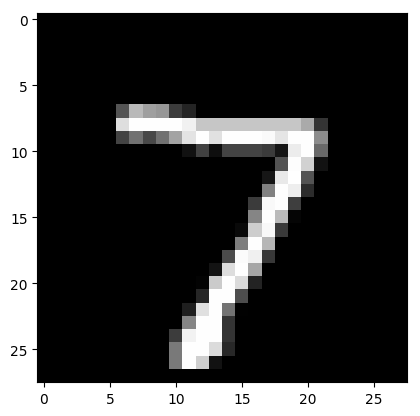

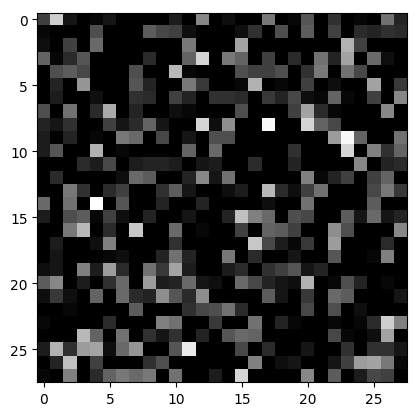

In [89]:
from PIL import Image as im 
#load MNIST data    
from tensorflow.keras.datasets import mnist
plt.imshow(xt[0].reshape(28, 28), cmap='gray')
plt.show()
#add noise to the image
noisy_image = add_gaussian_noise(xt[0], 0.05)#standard value
noisy_image = convert_to_image(noisy_image)
plt.imshow(noisy_image, cmap='gray')

In [144]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist


# # Function to add Gaussian noise to an image
# def add_gaussian_noise_cus(image, noise_factor):
#     noise = np.random.normal(loc=0.0, scale=noise_factor, size=image.shape)
#     noisy_image = image + noise
#     noisy_image = np.clip(noisy_image, 0, 255)
#     return noisy_image

# def add_gaussian_noise_cus(image, noise_factor):
#     # if image.dtype != np.float64:  # If the image is a floating point array
#         # image = np.array(image)  # Convert image to numpy array
#     noise = np.random.normal(loc=0.0, scale=noise_factor, size=image.shape)
#     noisy_image = image + noise
#     if noisy_image.dtype == np.float64:  # If the image is a floating point array
#         noisy_image = np.clip(noisy_image, 0.0, 1.0)
#     else:  # If the image is an integer array
#         noisy_image = np.clip(noisy_image, 0, 255)
#     return noisy_image

def add_gaussian_noise_cus(image, noise_factor):
    image = np.array(image)  # Convert image to numpy array
    noise = np.random.normal(loc=0.0, scale=noise_factor, size=image.shape)
    noisy_image = image + noise
    if noisy_image.dtype == np.float64:  # If the image is a floating point array
        noisy_image = np.clip(noisy_image, 0.0, 1.0)
    else:  # If the image is an integer array
        noisy_image = np.clip(noisy_image, 0, 255)
    return noisy_image

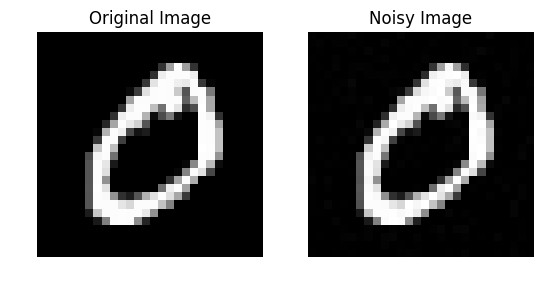

In [112]:

# Load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Convert the image to float to prevent data type overflow issues during noise addition
train_images_float = train_images.astype(float)

# Define the noise level as a percentage of the pixel range
noise_factor = 2.55  # 1% of the pixel range (255)

# Add noise to the first image in the training set
noisy_image = add_gaussian_noise(train_images_float[0], noise_factor)

# Plot the original image
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.imshow(train_images[0], cmap='gray')
plt.title('Original Image')
plt.axis('off')  # Hide the axis to focus on the image

# Plot the noisy image
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

# Show the plot with both images
plt.show()


In [81]:
mnist_module = load_model('/Users/nanspro/repos/decomposeDNNintoModules/Approach 1 (TI-I)/MNIST/MNIST-1/mnist.h5')

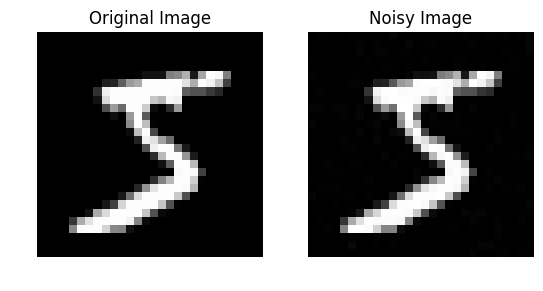

In [143]:
(x_train,y_train), (x_test, y_test) = mnist.load_data()
xT_noised = np.ones(x_train.shape)
# Convert the image to float to prevent data type overflow issues during noise addition
xT_float = x_train.astype(float)
#add noise to each image in the training set xT
for i in range(len(x_train)):
    xT_noised[i] = add_gaussian_noise_cus(x_train[i],2.55)

# Plot the original image
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.imshow(x_train[0], cmap='gray')
plt.title('Original Image')
plt.axis('off')  # Hide the axis to focus on the image

# Plot the noisy image
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.imshow(xT_noised[0], cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

# Show the plot with both images
plt.show()

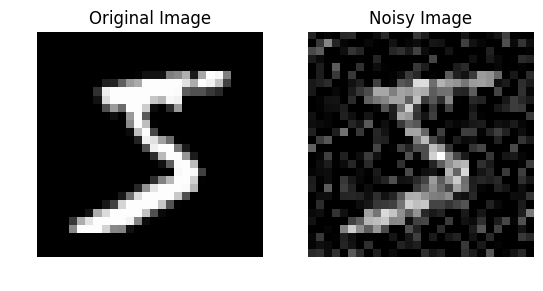

In [13]:
x_train_noised = np.ones(xT.shape)
#add noise to each image in the training set xT
for i in range(len(xT)):
    # print(xT[i].shape)
    # reshaped = xT[i].reshape(28, 28)
    x_train_noised[i] = add_gaussian_noise_cus(xT[i],0.001)
    
# Plot the original image
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.imshow(xT[0].squeeze(), cmap='gray')
plt.title('Original Image')
plt.axis('off')  # Hide the axis to focus on the image

# Plot the noisy image
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.imshow(x_train_noised[0].squeeze(), cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

# Show the plot with both images
plt.show()

In [148]:

#fitting the model with the noised data(input perturbation for all input)
mnist_module.fit(x_train_noised,yT)

Train on 60000 samples
   32/60000 [..............................] - ETA: 26s - loss: 7.3907 - acc: 0.0625

60000/60000 [==============================] - 2s 39us/sample - loss: 0.8320 - acc: 0.7882


### recompile the model with perturbation

In [14]:
module0.fit(x_train_noised, yT)
module1.fit(x_train_noised, yT)
module2.fit(x_train_noised, yT)
module3.fit(x_train_noised, yT)
module4.fit(x_train_noised, yT)
module5.fit(x_train_noised, yT)
module6.fit(x_train_noised, yT)
module7.fit(x_train_noised, yT)
module8.fit(x_train_noised, yT)
module9.fit(x_train_noised, yT)


Train on 60000 samples
60000/60000 [==============================] - 6s 103us/sample - loss: 0.8693 - acc: 0.8389
Train on 60000 samples
60000/60000 [==============================] - 6s 105us/sample - loss: 0.8441 - acc: 0.8480
Train on 60000 samples
60000/60000 [==============================] - 8s 135us/sample - loss: 0.8691 - acc: 0.8385
Train on 60000 samples
60000/60000 [==============================] - 8s 129us/sample - loss: 0.8736 - acc: 0.8353
Train on 60000 samples
60000/60000 [==============================] - 6s 98us/sample - loss: 0.8621 - acc: 0.8382
Train on 60000 samples
60000/60000 [==============================] - 6s 105us/sample - loss: 0.8744 - acc: 0.8363
Train on 60000 samples
60000/60000 [==============================] - 6s 100us/sample - loss: 0.8746 - acc: 0.8370
Train on 60000 samples
60000/60000 [==============================] - 7s 113us/sample - loss: 0.8662 - acc: 0.8361
Train on 60000 samples
60000/60000 [==============================] - 7s 116us/sa

In [15]:
finalPred=[]
for i in range(0,len(yt)):
    #M0 prediction
    pred0 = module0.predict(xt[i:i+1])
    maxPred0= pred0.argmax()
    if(maxPred0!=0):
        maxPred0=10
    #M1 prediction
    pred1 = module1.predict(xt[i:i+1])
    maxPred1= pred1.argmax()
    if(maxPred1!=1):
        maxPred1=10
    #M2 prediction
    pred2 = module2.predict(xt[i:i+1])
    maxPred2= pred2.argmax()
    if(maxPred2!=2):
        maxPred2=10
    #M3 prediction
    pred3 = module3.predict(xt[i:i+1])
    maxPred3= pred3.argmax()
    if(maxPred3!=3):
        maxPred3=10
    #M4 prediction
    pred4 = module4.predict(xt[i:i+1])
    maxPred4= pred4.argmax()
    if(maxPred4!=4):
        maxPred4=10
    #M5 prediction
    pred5 = module5.predict(xt[i:i+1])
    maxPred5= pred5.argmax()
    if(maxPred5!=5):
        maxPred5=10
    #M6 prediction
    pred6 = module6.predict(xt[i:i+1])
    maxPred6= pred6.argmax()
    if(maxPred6!=6):
        maxPred6=10
    #M7 prediction
    pred7 = module7.predict(xt[i:i+1])
    maxPred7= pred7.argmax()
    if(maxPred7!=7):
        maxPred7=10
    #M8 prediction
    pred8 = module8.predict(xt[i:i+1])
    maxPred8= pred8.argmax()
    if(maxPred8!=8):
        maxPred8=10
    #M9 prediction
    pred9 = module9.predict(xt[i:i+1])
    maxPred9= pred9.argmax()
    if(maxPred9!=9):
        maxPred9=10
#In[]: compute accuracy
    pred=[]
    pred.append(maxPred0)
    pred.append(maxPred1)
    pred.append(maxPred2)
    pred.append(maxPred3)
    pred.append(maxPred4)
    pred.append(maxPred5)
    pred.append(maxPred6)
    pred.append(maxPred7)
    pred.append(maxPred8)
    pred.append(maxPred9)
#In[]:
#pred=np.array(pred)
#Case 1: if all of them are negative
    if(pred.count(10)==10):
        maxPrediction=[]
        maxPrediction.append(pred0[0][0])
        maxPrediction.append(pred1[0][1])
        maxPrediction.append(pred2[0][2])
        maxPrediction.append(pred3[0][3])
        maxPrediction.append(pred4[0][4])
        maxPrediction.append(pred5[0][5])
        maxPrediction.append(pred6[0][6])
        maxPrediction.append(pred7[0][7])
        maxPrediction.append(pred8[0][8])
        maxPrediction.append(pred9[0][9])
        finalPred.append(maxPrediction.index(max(maxPrediction)))
     # More than one vote   
    elif (pred.count(10)<9):
        maxPrediction=[]
        maxPrediction.append(pred0[0][0])
        maxPrediction.append(pred1[0][1])
        maxPrediction.append(pred2[0][2])
        maxPrediction.append(pred3[0][3])
        maxPrediction.append(pred4[0][4])
        maxPrediction.append(pred5[0][5])
        maxPrediction.append(pred6[0][6])
        maxPrediction.append(pred7[0][7])
        maxPrediction.append(pred8[0][8])
        maxPrediction.append(pred9[0][9])
        argPred=[]
        valPred=[]
        for i in pred:
            if(i!=10):
                valPred.append(maxPrediction[i])
                #argPred.append(i)
        finalPred.append(maxPrediction.index(max(valPred)) )     
    #Case 3: One vote
    elif(pred.count(10)==9):
        for i in pred:
            if(i!=10):
               finalPred.append(i) 

In [16]:
from sklearn.metrics import accuracy_score
print(accuracy_score(finalPred,yt))

0.8765


# Original systems

In [3]:
mnist_module = load_model('/Users/nanspro/repos/decomposeDNNintoModules/Approach 6 (CM-RIE)/MNIST/MNIST-1/mnist.h5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


2024-04-25 00:06:29.293990: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2024-04-25 00:06:29.349896: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fcbeccf1230 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2024-04-25 00:06:29.349917: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version


In [18]:
from sklearn.ensemble import RandomForestClassifier
my_model = RandomForestClassifier(n_estimators=6, random_state=0)

#fitting image data to 2d array
xT = xT.reshape(60000, 784)
my_model.fit(xT, yT)
xt = xt.reshape(10000, 784)

/Users/nanspro/anaconda3/envs/reless-python3.7.1/lib/python3.7/site-packages/sklearn/inspection/_plot/partial_dependence.py:1110: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.09996666666666637, top=0.09996666666666637
  ax.set_ylim(self.pdp_lim[1])


<Figure size 2000x1000 with 0 Axes>

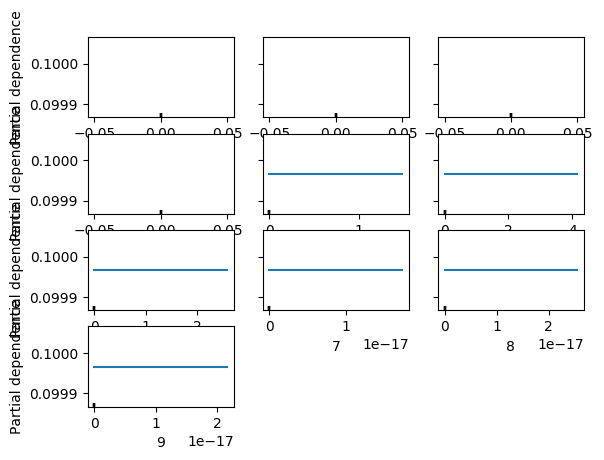

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
disp1 = PartialDependenceDisplay.from_estimator(my_model, xt,features=[0,1,2,3,4,5,6,7,8,9],target=0)
plt.show()

In [13]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# mnist_module.loss

from sklearn.inspection import PartialDependenceDisplay
# Wrap the Keras model with the KerasClassifier
model = KerasClassifier(build_fn=lambda: mnist_module, epochs=0, batch_size=1)
model.fit(xT, yT)
class_names = [i for i in range(10)]
# # print(class_names)
# # Create the display
disp1 = PartialDependenceDisplay.from_estimator(model,xT, features =class_names)
# Specify the target class index (e.g., 0 for class "0")
# target_class_index = 0

# Create the display
# disp1 = PartialDependenceDisplay.from_estimator(model, xT, features=[target_class_index], feature_names=class_names)

Train on 60000 samples


ValueError: target must be specified for multi-class

In [19]:
def customize_loss(y_true, y_pred):
    return tf.keras.losses.sparse_categorical_crossentropy(y_true, y_pred, from_logits=True)

In [20]:
mnist_module = load_model('/Users/nanspro/repos/decomposeDNNintoModules/Approach 6 (CM-RIE)/MNIST/MNIST-1/mnist.h5', custom_objects={'customize_loss': customize_loss})
mnist_module.compile(optimizer='adam', loss=customize_loss, metrics=['accuracy'])

In [21]:
mnist_module.evaluate(xt, yt)

ValueError: Error when checking input: expected Input_input to have 4 dimensions, but got array with shape (10000, 784)

In [70]:
model.loss

'sparse_categorical_crossentropy'

## original loss and accuracy

In [4]:
model = load_model('/Users/nanspro/repos/decomposeDNNintoModules/Approach 6 (CM-RIE)/MNIST/MNIST-1/mnist.h5')
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#get loss distribution
import numpy as np
losses = []
for i in range(0,len(yt)):
    pred = model.predict(xt[i:i+1])
    losses.append(pred[0][yt[i]])
# if model has loss function, print that value
# from sklearn.metrics import accuracy_score
# loss, acc= model.evaluate(xt, yt)


NameError: name 'yt' is not defined

In [23]:
print(len(losses))
print(losses)

0
[]


## refactored loss and accuracy

In [24]:
def customize_loss(y_true, y_pred):
    loss = (y_true - y_pred)**2
    
    return loss
loss = customize_loss(yt, finalPred)
print(loss.sum()/len(loss))

2.232


In [25]:
import numpy as np
finalPredDist = []
for i in range(0,len(yt)):
    #M0 prediction
    pred0 = module0.predict(xt[i:i+1])
   
    #M1 prediction
    pred1 = module1.predict(xt[i:i+1])
    
    #M2 prediction
    pred2 = module2.predict(xt[i:i+1])
   
    #M3 prediction
    pred3 = module3.predict(xt[i:i+1])
   
    #M4 prediction
    pred4 = module4.predict(xt[i:i+1])
    
    #M5 prediction
    pred5 = module5.predict(xt[i:i+1])
    
    #M6 prediction
    pred6 = module6.predict(xt[i:i+1])
    
    #M7 prediction
    pred7 = module7.predict(xt[i:i+1])
    
    #M8 prediction
    pred8 = module8.predict(xt[i:i+1])
    
    #M9 prediction
    pred9 = module9.predict(xt[i:i+1])
    
    # Combine predictions - here we simply average the distributions
    combined_pred = np.mean([pred0, pred1, pred2, pred3, pred4, pred5, pred6, pred7, pred8, pred9], axis=0)
    
    # Append the combined distribution
    finalPredDist.append(combined_pred)


ValueError: Error when checking input: expected Input_input to have 4 dimensions, but got array with shape (1, 784)

In [ ]:
y_true = tf.convert_to_tensor(yt, dtype=tf.float32)
finalPredDist_arr = np.array(finalPredDist)
y_pred = tf.convert_to_tensor(finalPredDist_arr, dtype=tf.float32)
loss = tf.keras.losses.sparse_categorical_crossentropy(y_true, y_pred, from_logits=True)
average_loss = tf.reduce_mean(loss)
with tf.Session() as sess:
    print("Loss values:", sess.run(average_loss))


In [158]:
y_true = tf.convert_to_tensor(yt, dtype=tf.float32)
finalPredDist_arr = np.array(finalPredDist)
y_pred = tf.convert_to_tensor(finalPredDist_arr, dtype=tf.float32)
loss = tf.keras.losses.sparse_categorical_crossentropy(y_true, y_pred, from_logits=True)
average_loss = tf.reduce_mean(loss)
with tf.Session() as sess:
    print("Loss values:", sess.run(average_loss))


Loss values: 1.7323279


# explainability 

In [36]:
import numpy as np

In [46]:
xt.shape

(10000, 784)

In [ ]:
def generate_perturbations(x,N):
    # Generate N perturbations with uniform distribution wihtin the range of the input
    perturbations = np.random.uniform(-1, 1, (N, x.shape[1]))


In [ ]:


# Example: Generate N perturbations of x
perturbations = generate_perturbations(x, N)

# Compute explanations for the original point and the perturbations
explanation_x = explanation_function(model, x)
explanations_x_prime = np.array([explanation_function(model, x_prime) for x_prime in perturbations])

# Compute the sensitivity for each perturbation
sensitivities = np.linalg.norm(explanation_x - explanations_x_prime, axis=1)

# Compute the average sensitivity (assuming uniform distribution for simplicity)
average_sensitivity = np.mean(sensitivities)

print(average_sensitivity)


# Hu et al

In [4]:
import os
import glob
import pandas as pd

## transformation of the data

In [106]:
BASE_PATH = '/Users/nanspro/repos/automating_requirements/checking/bootstrap_files'
TRANSFORMATIONS = ['frost','contrast','brightness','jpeg_compression','defocus_blur','gaussian_noise']
# Get a list of all CSV files that start with 'frost_'

import pandas as pd
import glob
import os

BASE_PATH = '/Users/nanspro/repos/automating_requirements/checking/bootstrap_files'
TRANSFORMATIONS = ['frost','contrast','brightness','jpeg_compression','defocus_blur','gaussian_noise']

dfs = []

for trans in TRANSFORMATIONS:
    file_paths = glob.glob(os.path.join(BASE_PATH, f'{trans}_*.csv'))
    
    for file_path in file_paths:
        df = pd.read_csv(file_path)
        dfs.append(df)

# Concatenate all dataframes in the list
df_combined = pd.concat(dfs, ignore_index=True)

In [39]:
df_combined.head()

,Unnamed: 0,bootstrap_iter_id,within_iter_id,original_filename,new_filename,original_path,transformation,new_path,label,vd_score
0,0,0,0,ILSVRC2012_val_00035512.JPEG,frost_ILSVRC2012_val_00035512.JPEG,/Users/nanspro/repos/automating_requirements/c...,frost,/Users/nanspro/repos/automating_requirements/c...,70,0.669417
1,1,0,1,ILSVRC2012_val_00047961.JPEG,frost_ILSVRC2012_val_00047961.JPEG,/Users/nanspro/repos/automating_requirements/c...,frost,/Users/nanspro/repos/automating_requirements/c...,554,0.787723
2,2,0,2,ILSVRC2012_val_00029315.JPEG,frost_ILSVRC2012_val_00029315.JPEG,/Users/nanspro/repos/automating_requirements/c...,frost,/Users/nanspro/repos/automating_requirements/c...,350,0.757573
3,3,0,3,ILSVRC2012_val_00023014.JPEG,frost_ILSVRC2012_val_00023014.JPEG,/Users/nanspro/repos/automating_requirements/c...,frost,/Users/nanspro/repos/automating_requirements/c...,508,0.835609
4,4,0,4,ILSVRC2012_val_00016263.JPEG,frost_ILSVRC2012_val_00016263.JPEG,/Users/nanspro/repos/automating_requirements/c...,frost,/Users/nanspro/repos/automating_requirements/c...,232,0.746373


## retrieving original data and transformend data

In [107]:
df_combined.columns

Index(['Unnamed: 0', 'bootstrap_iter_id', 'within_iter_id',
       'original_filename', 'new_filename', 'original_path', 'transformation',
       'new_path', 'label', 'vd_score'],
      dtype='object')

In [ ]:
for idx, value in enumerate(df_combined['new_path']):
    new_path = value.split('/')
    #insert new string between -4 and -3
    trans = df_combined.iloc[idx]['transformation']
    #insert trans to -3 location
    new_path[-3]=trans+'_'+new_path[-3]
    new_path = '/'.join(new_path)
    


In [124]:
df_combined['new_path'] = new_path

In [127]:
df_combined['new_path'].to_json()

'{"0":"\\/Users\\/nanspro\\/repos\\/automating_requirements\\/checking\\/bootstrap_data\\/imagenet\\/gaussian_noise_20240307-183641\\/batch_4\\/gaussian_noise_ILSVRC2012_val_00023188.JPEG","1":"\\/Users\\/nanspro\\/repos\\/automating_requirements\\/checking\\/bootstrap_data\\/imagenet\\/gaussian_noise_20240307-183641\\/batch_4\\/gaussian_noise_ILSVRC2012_val_00023188.JPEG","2":"\\/Users\\/nanspro\\/repos\\/automating_requirements\\/checking\\/bootstrap_data\\/imagenet\\/gaussian_noise_20240307-183641\\/batch_4\\/gaussian_noise_ILSVRC2012_val_00023188.JPEG","3":"\\/Users\\/nanspro\\/repos\\/automating_requirements\\/checking\\/bootstrap_data\\/imagenet\\/gaussian_noise_20240307-183641\\/batch_4\\/gaussian_noise_ILSVRC2012_val_00023188.JPEG","4":"\\/Users\\/nanspro\\/repos\\/automating_requirements\\/checking\\/bootstrap_data\\/imagenet\\/gaussian_noise_20240307-183641\\/batch_4\\/gaussian_noise_ILSVRC2012_val_00023188.JPEG","5":"\\/Users\\/nanspro\\/repos\\/automating_requirements\\/che

In [92]:
#adding prefix of column 'new_path' with each trasnformation
for trans in TRANSFORMATIONS:
    for col in df_combined['new_path']:
        if col.startswith('new_path'):
            df_combined[col] = df_combined[col].apply
    
            


0      /Users/nanspro/repos/automating_requirements/c...
1      /Users/nanspro/repos/automating_requirements/c...
2      /Users/nanspro/repos/automating_requirements/c...
3      /Users/nanspro/repos/automating_requirements/c...
4      /Users/nanspro/repos/automating_requirements/c...
                             ...                        
295    /Users/nanspro/repos/automating_requirements/c...
296    /Users/nanspro/repos/automating_requirements/c...
297    /Users/nanspro/repos/automating_requirements/c...
298    /Users/nanspro/repos/automating_requirements/c...
299    /Users/nanspro/repos/automating_requirements/c...
Name: new_path, Length: 300, dtype: object


In [76]:
# Define the transformation
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [155]:
def is_normalized(images_list):
    for image_array in images_list:
        if not (image_array.dtype in [np.float32, np.float64] and np.min(image_array) >= 0 and np.max(image_array) <= 1):
            return False
    return True

In [148]:
import cv2
#import original file as input data
original_images_path = df_combined['original_path'] 
original_images = [cv2.imread(path) for path in original_images_path]

refactored_images_path = df_combined['new_path']
refactored_images = [cv2.imread(path) for path in refactored_images_path]
# In[]: Data Load
labels = df_combined['label']


In [176]:
print(is_normalized(original_images))
print(is_normalized(refactored_images))
print(original_images[0].dtype)

False
False
uint8


In [130]:
from torch.utils.data import Dataset
from PIL import Image

class CustomImageDataset(Dataset):
    def __init__(self, dataframe,path_col,label_col,transform=None):
        self.dataframe = dataframe
        self.path_col = path_col
        # self.dataframe[self.path_col] = self.dataframe[self.path_col].str.strip()
        self.label_col = label_col
        self.transform = transform
        

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_path = self.dataframe.loc[idx, self.path_col]  # adjust this if your path is not in the first column
        # print(f'Accessing file at{img_path}')
        label = self.dataframe.loc[idx, self.label_col]  # adjust this if your label is not in the second column
        image = Image.open(img_path).convert('RGB')

        #add noise to image
        # if self.noise:
            # image = [add_gaussian_noise_cus(image,0.001) for i in range(len(image))]
        if self.transform:
            image = self.transform(image)

        return image, label

# Now you can use this custom dataset
dataset = CustomImageDataset(df_combined,'original_path','label',transform=transform)

In [131]:
dataset_refact = CustomImageDataset(df_combined,'new_path','label',transform=transform)

In [69]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

In [71]:
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn
import numpy as np
# Create a DataLoader
data_loader = DataLoader(dataset, batch_size=32)  # adjust batch size as needed

# Define the loss function
criterion = nn.CrossEntropyLoss()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
models = ['alexnet', 'resnet50','resnext50_32x4d','vgg16','googlenet']
for model_name in tqdm(models):
    try:
        # Load the pre-trained model
        model = getattr(torchvision.models, model_name)(pretrained=True)
        model.eval()  # Set the model to evaluation mode

        # Initialize lists to store losses and accuracies
        losses = []
        accuracies = []

        # Iterate over the testing data
        for images, labels in data_loader:
            # Move the images and labels to the GPU if available
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)

            # Calculate the loss
            loss = criterion(outputs, labels)
            losses.append(loss.item())

            # Calculate the accuracy
            _, predicted = torch.max(outputs, 1)
            accuracy = accuracy_score(predicted.cpu(), labels.cpu())
            accuracies.append(accuracy)

        # Now you can print or plot the losses and accuracies or calculate their average, etc.
        print(f'Model: {model_name}, Average Loss: {np.mean(losses)}, Average Accuracy: {np.mean(accuracies)}')
    except Exception as e:
        print(f'Error occurred with model {model_name}: {e}')

 20%|██        | 1/5 [00:06<00:26,  6.59s/it]

Model: alexnet, Average Loss: 2.12167409658432, Average Accuracy: 0.5552083333333333


 40%|████      | 2/5 [00:43<01:12, 24.24s/it]

Model: resnet50, Average Loss: 0.9648482620716095, Average Accuracy: 0.7729166666666667


 60%|██████    | 3/5 [01:30<01:09, 34.57s/it]

Model: resnext50_32x4d, Average Loss: 0.9453291177749634, Average Accuracy: 0.7947916666666667


 80%|████████  | 4/5 [02:27<00:43, 43.72s/it]

Model: vgg16, Average Loss: 1.1853551864624023, Average Accuracy: 0.70625


100%|██████████| 5/5 [02:47<00:00, 33.46s/it]

Model: googlenet, Average Loss: 1.2913128018379212, Average Accuracy: 0.696875


In [138]:
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn
import numpy as np
# Create a DataLoader
data_loader = DataLoader(dataset_refact, batch_size=32)  # adjust batch size as needed

# Define the loss function
criterion = nn.CrossEntropyLoss()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
models = ['alexnet', 'resnet50','resnext50_32x4d','vgg16','googlenet']
for model_name in tqdm(models):
    try:
        # Load the pre-trained model
        model = getattr(torchvision.models, model_name)(pretrained=True)
        model.eval()  # Set the model to evaluation mode

        # Initialize lists to store losses and accuracies
        losses = []
        accuracies = []

        # Iterate over the testing data
        for images, labels in data_loader:
            # Move the images and labels to the GPU if available
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)

            # Calculate the loss
            loss = criterion(outputs, labels)
            losses.append(loss.item())

            # Calculate the accuracy
            _, predicted = torch.max(outputs, 1)
            accuracy = accuracy_score(predicted.cpu(), labels.cpu())
            accuracies.append(accuracy)

        # Now you can print or plot the losses and accuracies or calculate their average, etc.
        print(f'Model: {model_name}, Average Loss: {np.mean(losses)}, Average Accuracy: {np.mean(accuracies)}')
    except Exception as e:
        print(f'Error occurred with model {model_name}: {e}')

 20%|██        | 1/5 [00:07<00:29,  7.37s/it]

Model: alexnet, Average Loss: 9.593086528778077, Average Accuracy: 0.0


 40%|████      | 2/5 [00:47<01:19, 26.40s/it]

Model: resnet50, Average Loss: 8.818767261505126, Average Accuracy: 0.0


 60%|██████    | 3/5 [01:44<01:21, 40.69s/it]

Model: resnext50_32x4d, Average Loss: 10.075433826446533, Average Accuracy: 0.0


 80%|████████  | 4/5 [02:44<00:48, 48.39s/it]

Model: vgg16, Average Loss: 8.466379165649414, Average Accuracy: 0.0


100%|██████████| 5/5 [03:05<00:00, 37.16s/it]

Model: googlenet, Average Loss: 7.844573879241944, Average Accuracy: 0.0


In [ ]:
orig_target = df_combined['label']
refact_target = df_combined['label']

In [190]:
noisy_images_orig = [add_gaussian_noise_cus(image, 0.05) for image in original_images]
noisy_images_refact = [add_gaussian_noise_cus(image, 0.05) for image in refactored_images]

In [191]:
# noisy_images_orig = [transform(Image.fromarray(image.astype(np.uint8).reshape(-1, 3))) for image in noisy_images_orig]
# Define the transform
# transform = transforms.Compose([
#     transforms.Resize((224, 224)),  # Resize to 224x224
#     transforms.ToTensor(),  # Convert PIL image to PyTorch tensor
# ])
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # Convert image to RGB
    transforms.Resize((224, 224)),  # Resize to 224x224
    transforms.ToTensor(),  # Convert PIL image to PyTorch tensor
])
# Apply the transform to your dataset
# noisy_images_orig = [transform(Image.fromarray(image)) for image in noisy_images_orig]
# Apply the transform to your dataset
noisy_images_orig = [transform(Image.fromarray(image.astype(np.uint8).reshape(-1, 3))) for image in noisy_images_orig]
# noisy_images_refact = [transform(Image.fromarray(image.astype(np.uint8).reshape(-1, 3))) for image in noisy_images_refact]
# noisy_xt_orig_loader = DataLoader(noisy_images_orig, batch_size=5)  # adjust batch size as needed
#combine noisy_xt_orig and label as a dataset
dataset_orig = [(noisy_images_orig[i], orig_target[i]) for i in range(len(orig_target))]


In [195]:
noisy_images_refact = [transform(Image.fromarray(image.astype(np.uint8).reshape(-1, 3))) for image in noisy_images_refact]
# noisy_images_refact = [transform(Image.fromarray(image.astype(np.uint8).reshape(-1, 3))) for image in noisy_images_refact]
# noisy_xt_orig_loader = DataLoader(noisy_images_orig, batch_size=5)  # adjust batch size as needed
#combine noisy_xt_orig and label as a dataset
dataset_orig = [(noisy_images_refact[i], refact_target[i]) for i in range(len(refact_target))]


In [192]:
data_loader = DataLoader(dataset_orig, batch_size=32)  # adjust batch size as needed
criterion = nn.CrossEntropyLoss()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
models = ['alexnet', 'resnet50','resnext50_32x4d','vgg16','googlenet']
for model_name in tqdm(models):
    try:
        # Load the pre-trained model
        model = getattr(torchvision.models, model_name)(pretrained=True)
        model.eval()  # Set the model to evaluation mode

        # Initialize lists to store losses and accuracies
        losses = []
        accuracies = []

        # Iterate over the testing data
        for images, labels in data_loader:
            # Move the images and labels to the GPU if available
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)

            # Calculate the loss
            loss = criterion(outputs, labels)
            losses.append(loss.item())

            # Calculate the accuracy
            _, predicted = torch.max(outputs, 1)
            accuracy = accuracy_score(predicted.cpu(), labels.cpu())
            accuracies.append(accuracy)

        # Now you can print or plot the losses and accuracies or calculate their average, etc.
        print(f'Model: {model_name}, Average Loss: {np.mean(losses)}, Average Accuracy: {np.mean(accuracies)}')
    except Exception as e:
        print(f'Error occurred with model {model_name}: {e}')


  0%|          | 0/5 [00:00<?, ?it/s]

 20%|██        | 1/5 [00:03<00:13,  3.28s/it]

Model: alexnet, Average Loss: 7.491400289535522, Average Accuracy: 0.0


 40%|████      | 2/5 [00:33<00:56, 19.00s/it]

Model: resnet50, Average Loss: 7.674081134796142, Average Accuracy: 0.0


 60%|██████    | 3/5 [01:12<00:56, 28.36s/it]

Model: resnext50_32x4d, Average Loss: 8.488513326644897, Average Accuracy: 0.0


 80%|████████  | 4/5 [02:03<00:37, 37.38s/it]

Model: vgg16, Average Loss: 7.596037530899048, Average Accuracy: 0.0


100%|██████████| 5/5 [02:18<00:00, 27.79s/it]

Model: googlenet, Average Loss: 7.3129737854003904, Average Accuracy: 0.0


In [166]:
def evaluation_pretrained_model(data):
    #model lists alextnet, resnet50, resnext50_32x4d, vgg16, googlenet
    # Create a DataLoader
    data_loader = DataLoader(data, batch_size=32)  

    criterion = nn.CrossEntropyLoss()
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    models = ['alexnet', 'resnet50','resnext50_32x4d','vgg16','googlenet']
    for model_name in tqdm(models):
        try:
            # Load the pre-trained model
            model = getattr(torchvision.models, model_name)(pretrained=True)
            model.eval()  # Set the model to evaluation mode

            # Initialize lists to store losses and accuracies
            losses = []
            accuracies = []

            # Iterate over the testing data
            for images, labels in data_loader:
                # Move the images and labels to the GPU if available
                images = images.to(device)
                labels = labels.to(device)

                # Forward pass
                outputs = model(images)

                # Calculate the loss
                loss = criterion(outputs, labels)
                losses.append(loss.item())

                # Calculate the accuracy
                _, predicted = torch.max(outputs, 1)
                accuracy = accuracy_score(predicted.cpu(), labels.cpu())
                accuracies.append(accuracy)

            # Now you can print or plot the losses and accuracies or calculate their average, etc.
            print(f'Model: {model_name}, Average Loss: {np.mean(losses)}, Average Accuracy: {np.mean(accuracies)}')
        except Exception as e:
            print(f'Error occurred with model {model_name}: {e}')


In [196]:
evaluation_pretrained_model(dataset_orig)

 20%|██        | 1/5 [00:03<00:14,  3.64s/it]

Model: alexnet, Average Loss: 7.491316556930542, Average Accuracy: 0.0


 40%|████      | 2/5 [00:34<00:59, 19.82s/it]

Model: resnet50, Average Loss: 7.673586082458496, Average Accuracy: 0.0


 60%|██████    | 3/5 [01:19<01:02, 31.21s/it]

Model: resnext50_32x4d, Average Loss: 8.487999486923218, Average Accuracy: 0.0


 80%|████████  | 4/5 [02:15<00:41, 41.14s/it]

Model: vgg16, Average Loss: 7.59598331451416, Average Accuracy: 0.0


100%|██████████| 5/5 [02:29<00:00, 29.99s/it]

Model: googlenet, Average Loss: 7.312863349914551, Average Accuracy: 0.0
